In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model_tree = DecisionTreeClassifier()

In [12]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
model_tree.score(x_train, y_train)

1.0

In [14]:
model_tree.score(x_test, y_test)

0.696969696969697

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gr_model = GradientBoostingClassifier(n_estimators =100, learning_rate = 0.075, max_features =2,
max_depth =2, random_state =0)

In [17]:
gr_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.075, max_depth=2, max_features=2,
                           random_state=0)

In [18]:
gr_model.score(x_train, y_train)

0.8268156424581006

In [19]:
gr_model.score(x_test, y_test)

0.8225108225108225

In [20]:
y_predict = gr_model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[133,  13],
       [ 28,  57]], dtype=int64)

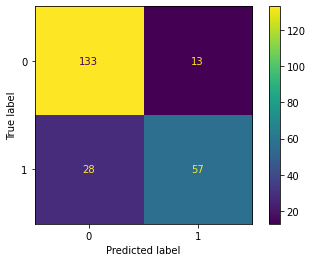

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gr_model, x_test, y_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       146
           1       0.81      0.67      0.74        85

    accuracy                           0.82       231
   macro avg       0.82      0.79      0.80       231
weighted avg       0.82      0.82      0.82       231

